The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [487]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Import and Examine the Dataset

In [488]:
df = pd.read_csv("./data/nobel.csv")

In [489]:
# Examine the first few rows
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [490]:
# Show summary statistics
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


In [491]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## Most Commonly Awarded Gender and Birth Country

In [492]:
# Find the unique values and their counts in the gender column
gender_counts = df['sex'].value_counts()
gender_counts

Male      905
Female     65
Name: sex, dtype: int64

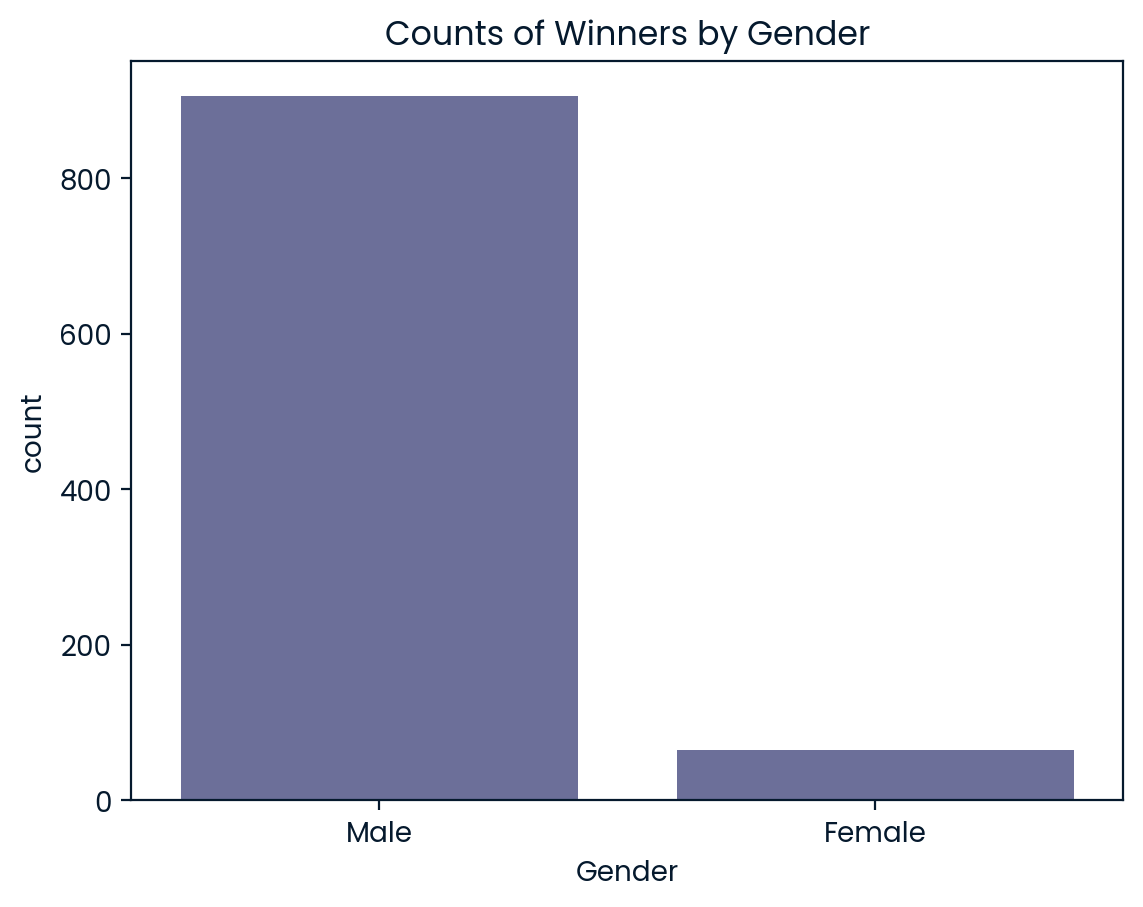

In [493]:
sns.countplot(x = 'sex', data = df)
plt.title("Counts of Winners by Gender")
plt.xlabel("Gender")
plt.show();

In [494]:
# Male is the gender that is commonly awarded
top_gender = 'Male'

In [495]:
# Find the unique values and their counts in the birth country column
birth_country_counts = df['birth_country'].value_counts()
birth_country_counts

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64

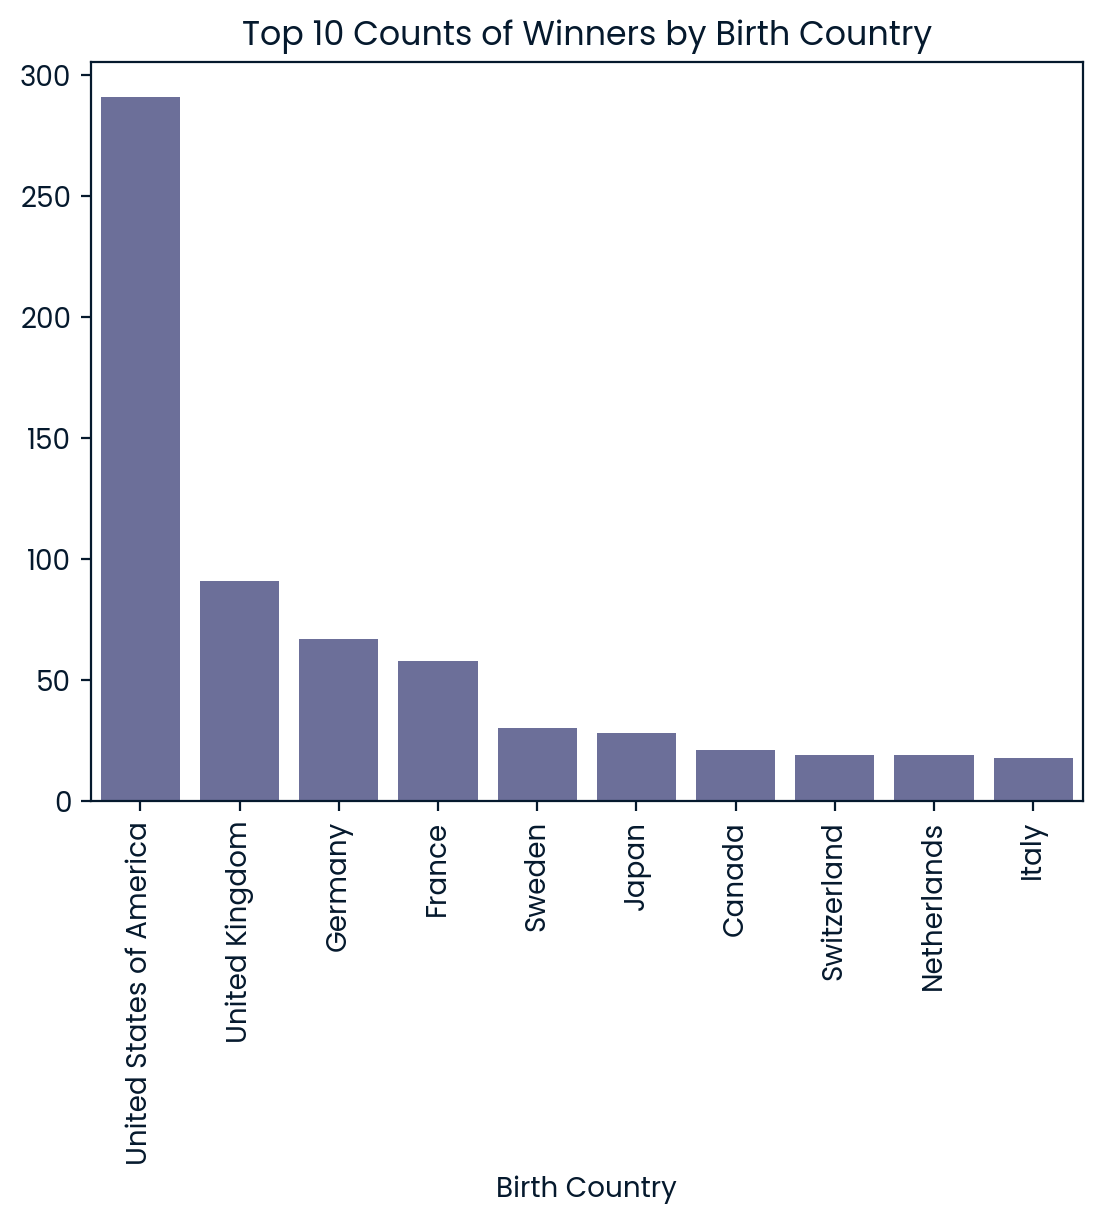

In [496]:
sns.barplot(x = birth_country_counts[:10].index, y = birth_country_counts[:10].values)
plt.title("Top 10 Counts of Winners by Birth Country")
plt.xlabel("Birth Country")
plt.xticks(rotation = 90)
plt.show();

In [497]:
# The country USA is the one that is most awarded
top_country = 'United States of America'

## Decade with the Highest Ratio of US-Born Winners

In [498]:
# Add a column that identifies USA winners
df2 = df.copy()
df2['United States of America'] = df['birth_country'].apply(lambda x: 'Yes' if x == 'United States of America'
                                                            else 'No')
df2.tail()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,United States of America
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaN,NaN,NaN,Yes
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaN,NaN,NaN,No
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaN,NaN,NaN,No
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,No
999,2023,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having advanced our understanding of wome...",1/1,1034,Individual,Claudia Goldin,1946-00-00,"New York, NY",United States of America,Female,Harvard University,"Cambridge, MA",United States of America,NaN,NaN,NaN,Yes


In [499]:
# Add a column to identify each decade
df2['decade'] = (df2['year'] // 10) * 10
df2.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,United States of America,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,No,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,No,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,No,1900
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,No,1900
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,No,1900


In [500]:
# Group by if the country is USA or not and each decade and calculate total winners
decade_usa_winners = df2.groupby(['decade', 'United States of America']).size().reset_index()
decade_usa_winners.columns = ['decade', 'United States of America', 'total_winners']
decade_usa_winners

,decade,United States of America,total_winners
0,1900,No,56
1,1900,Yes,1
2,1910,No,37
3,1910,Yes,3
4,1920,No,50
5,1920,Yes,4
6,1930,No,42
7,1930,Yes,14
8,1940,No,30
9,1940,Yes,13


In [501]:
# Create data that calculates the total winners in each decade
total_decade_winners = decade_usa_winners.groupby('decade')['total_winners'].sum().reset_index()
total_decade_winners

,decade,total_winners
0,1900,57
1,1910,40
2,1920,54
3,1930,56
4,1940,43
5,1950,72
6,1960,79
7,1970,104
8,1980,97
9,1990,104


In [502]:
# Merge the total winners of each decade with the main dataset
decade_usa_winners = pd.merge(decade_usa_winners, total_decade_winners, on = 'decade')
decade_usa_winners.columns = ['decade', 'United States of America', 'total_winners', 'total_decade_winners']
decade_usa_winners

,decade,United States of America,total_winners,total_decade_winners
0,1900,No,56,57
1,1900,Yes,1,57
2,1910,No,37,40
3,1910,Yes,3,40
4,1920,No,50,54
5,1920,Yes,4,54
6,1930,No,42,56
7,1930,Yes,14,56
8,1940,No,30,43
9,1940,Yes,13,43


In [503]:
# Add a column that calculates the ratio of winners in each decade
decade_usa_winners['ratio_winners'] = decade_usa_winners['total_winners'] / decade_usa_winners['total_decade_winners']
decade_usa_winners

,decade,United States of America,total_winners,total_decade_winners,ratio_winners
0,1900,No,56,57,0.982456
1,1900,Yes,1,57,0.017544
2,1910,No,37,40,0.925000
3,1910,Yes,3,40,0.075000
4,1920,No,50,54,0.925926
5,1920,Yes,4,54,0.074074
6,1930,No,42,56,0.750000
7,1930,Yes,14,56,0.250000
8,1940,No,30,43,0.697674
9,1940,Yes,13,43,0.302326


In [504]:
# Filter the data for USA winners and sort by maximum ratio
usa_winners_by_ratio = decade_usa_winners[decade_usa_winners['United States of America'] == 'Yes']
usa_winners_by_ratio.sort_values('ratio_winners', ascending = False, inplace = True)
usa_winners_by_ratio

,decade,United States of America,total_winners,total_decade_winners,ratio_winners
21,2000,Yes,52,123,0.422764
19,1990,Yes,42,104,0.403846
25,2020,Yes,18,50,0.360000
17,1980,Yes,31,97,0.319588
15,1970,Yes,33,104,0.317308
23,2010,Yes,38,121,0.314050
9,1940,Yes,13,43,0.302326
11,1950,Yes,21,72,0.291667
13,1960,Yes,21,79,0.265823
7,1930,Yes,14,56,0.250000


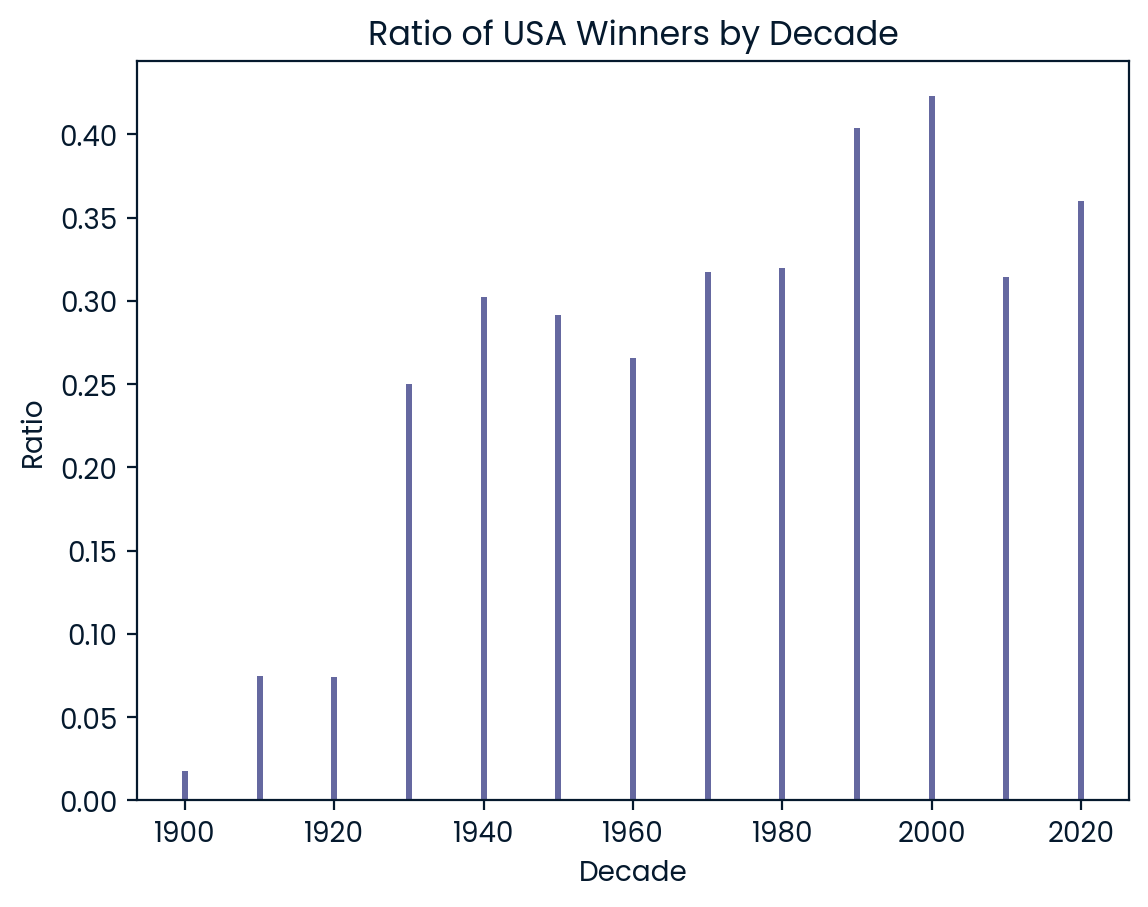

In [505]:
plt.bar(usa_winners_by_ratio['decade'], usa_winners_by_ratio['ratio_winners'])
plt.title("Ratio of USA Winners by Decade")
plt.xlabel("Decade")
plt.ylabel('Ratio')
plt.show();

In [506]:
# The highest ratio of US-born winners is in the 2000 decade
max_decade_usa = 2000

## Decade and Category with Highest Proportion of Female Laureates

In [507]:
# Filter for female winners
female_winners = df2.copy()
female_winners['female_winner'] = female_winners['sex'].apply(lambda x: True if x == "Female" else False)
female_winners.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,United States of America,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,No,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,No,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,No,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,No,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,No,1900,False


In [508]:
# Group by decade and category to find the one with highest proportion of female laureates
grouped_female_winners = female_winners.groupby(['decade', 'category'])['female_winner'].mean().reset_index()
grouped_female_winners.columns = ['decade', 'category', 'avg_winners']
grouped_female_winners

,decade,category,avg_winners
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
67,2020,Economics,0.111111
68,2020,Literature,0.500000
69,2020,Medicine,0.125000
70,2020,Peace,0.285714


In [509]:
# Find the row with the highest mean of female winners
max_mean_row = grouped_female_winners[grouped_female_winners['avg_winners'] == grouped_female_winners['avg_winners'].max()]

max_mean_row

,decade,category,avg_winners
68,2020,Literature,0.5


In [510]:
max_female_dict = {max_mean_row['decade'].values[0]: max_mean_row['category'].values[0]}
max_female_dict

{2020: 'Literature'}

## First Woman Winner and Category

In [511]:
# Filter by female winners
female_winners = df2[df2['sex'] == "Female"]

In [512]:
first_female_winner = female_winners.sort_values('year', ascending = True).iloc[0]
first_female_winner

year                                                                     1903
category                                                              Physics
prize                                         The Nobel Prize in Physics 1903
motivation                  "in recognition of the extraordinary services ...
prize_share                                                               1/4
laureate_id                                                                 6
laureate_type                                                      Individual
full_name                                         Marie Curie, née Sklodowska
birth_date                                                         1867-11-07
birth_city                                                             Warsaw
birth_country                                         Russian Empire (Poland)
sex                                                                    Female
organization_name                                               

In [513]:
first_woman_name = "Marie Curie, née Sklodowska"
first_woman_category = "Physics"

## Find Repeated Winners

In [514]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [515]:
repeated_winners = df.groupby('full_name').size().reset_index()
repeated_winners.columns = ['Full Name', 'Times Won']
repeated_winners.sort_values('Times Won', ascending = False, inplace = True)
repeated_winners

,Full Name,Times Won
162,Comité international de la Croix Rouge (Intern...,3
672,Office of the United Nations High Commissioner...,2
284,Frederick Sanger,2
576,Linus Carl Pauling,2
480,John Bardeen,2
...,...,...
336,Gertrude B. Elion,1
337,"Gerty Theresa Cori, née Radnitz",1
338,Giorgio Parisi,1
339,Giorgos Seferis,1


In [516]:
more_than_2_times = repeated_winners[repeated_winners['Times Won'] >= 2]
more_than_2_times

,Full Name,Times Won
162,Comité international de la Croix Rouge (Intern...,3
672,Office of the United Nations High Commissioner...,2
284,Frederick Sanger,2
576,Linus Carl Pauling,2
480,John Bardeen,2
601,"Marie Curie, née Sklodowska",2


In [517]:
repeat_list = list(more_than_2_times['Full Name'])
repeat_list 

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Linus Carl Pauling',
 'John Bardeen',
 'Marie Curie, née Sklodowska']